no missing values

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/File 1.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(None,
     N   P   K  temperature   humidity        ph    rainfall label
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice)

# New Section

The dataset contains 22 unique crops, each with 100 samples.

In [ ]:
# Check unique crop types and their distribution
crop_counts = df['label'].value_counts()
crop_counts


,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


Accuracy: 94.1%
Precision, Recall, F1-score: Most crops have high prediction scores, though blackgram, maize, and mothbeans show slightly lower accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encode the crop labels into numeric values
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Split data into features (X) and target (y)
X = df.drop(columns=['label', 'label_encoded'])  # Features
y = df['label_encoded']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, classification_rep


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9409090909090909,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        20\n      banana       1.00      1.00      1.00        20\n   blackgram       0.65      0.65      0.65        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       1.00      1.00      1.00        20\n      coffee       1.00      1.00      1.00        20\n      cotton       0.80      1.00      0.89        20\n      grapes       1.00      1.00      1.00        20\n        jute       0.87      1.00      0.93        20\n kidneybeans       1.00      1.00      1.00        20\n      lentil       0.89      0.85      0.87        20\n       maize       0.79      0.75      0.77        20\n       mango       1.00      1.00      1.00        20\n   mothbeans       0.79      0.75      0.77        20\n    mungbean       1.00      0.95      0.97        20\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1

Features are now standardized (mean = 0, variance = 1).
Data split:
Training set → 1,760 samples
Testing set → 440 samples

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

# Standardize the feature data (scaling to mean 0 and variance 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the transformed data
X_train.shape, X_test.shape


((1760, 7), (440, 7))

Random Forest Classifier Performance:

Accuracy: 99.5%
Most crops are classified perfectly, except for blackgram, maize, and rice, which have slight misclassifications.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

rf_accuracy, rf_classification_report


(0.9954545454545455,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        20\n      banana       1.00      1.00      1.00        20\n   blackgram       1.00      0.95      0.97        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       1.00      1.00      1.00        20\n      coffee       1.00      1.00      1.00        20\n      cotton       1.00      1.00      1.00        20\n      grapes       1.00      1.00      1.00        20\n        jute       0.95      1.00      0.98        20\n kidneybeans       1.00      1.00      1.00        20\n      lentil       1.00      1.00      1.00        20\n       maize       0.95      1.00      0.98        20\n       mango       1.00      1.00      1.00        20\n   mothbeans       1.00      1.00      1.00        20\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1

model evaluation

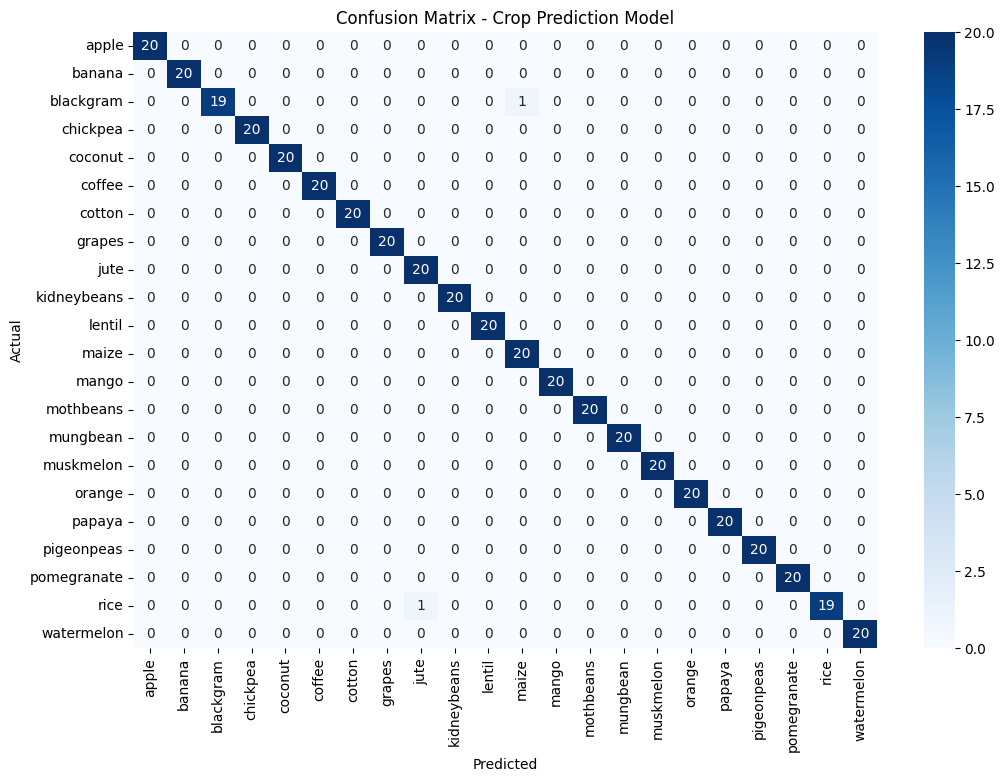

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Crop Prediction Model")
plt.show()


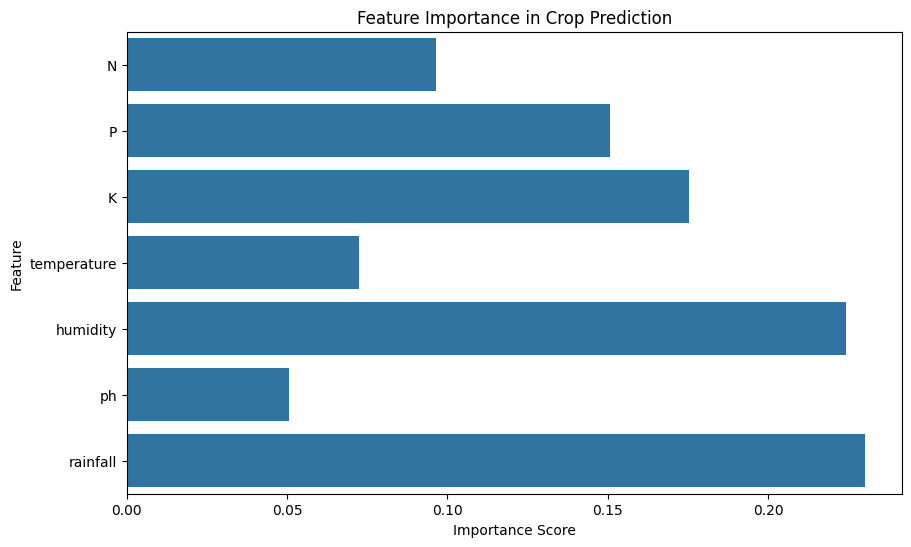

In [ ]:
# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Crop Prediction")
plt.show()


i found some misclassifications so i will use fine yuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [10, 20, None],          # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]         # Minimum samples per leaf
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

now i will train it with grid search

In [ ]:
# Train optimized Random Forest model
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predictions
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_classification_report = classification_report(y_test, y_pred_optimized, target_names=label_encoder.classes_)

optimized_accuracy, optimized_classification_report


(0.9954545454545455,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        20\n      banana       1.00      1.00      1.00        20\n   blackgram       1.00      0.95      0.97        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       1.00      1.00      1.00        20\n      coffee       1.00      1.00      1.00        20\n      cotton       1.00      1.00      1.00        20\n      grapes       1.00      1.00      1.00        20\n        jute       0.95      1.00      0.98        20\n kidneybeans       1.00      1.00      1.00        20\n      lentil       1.00      1.00      1.00        20\n       maize       0.95      1.00      0.98        20\n       mango       1.00      1.00      1.00        20\n   mothbeans       1.00      1.00      1.00        20\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1

by using grid search i made it reach 99.5%